# Zbiór danych v3

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import json

In [4]:
def load_jsonl(file_path: str) -> pd.DataFrame:
    with open(file_path, 'r', encoding='utf-8') as file:
        data = [json.loads(line) for line in file]
    return pd.DataFrame(data)

In [5]:
DATA_DIR = '../data/v4/'

In [6]:
artists_df = load_jsonl(DATA_DIR + 'artists.jsonl')
tracks_df = load_jsonl(DATA_DIR + 'tracks.jsonl')
users_df = load_jsonl(DATA_DIR + 'users.jsonl')
sessions_df = load_jsonl(DATA_DIR + 'sessions.jsonl')
track_storage_df = load_jsonl(DATA_DIR + 'track_storage.jsonl')

## Tabela artists

In [7]:
artists_df.head() 

,id,name,genres
0,72578usTM6Cj5qWsi471Nc,Raghu Dixit,"[filmi, indian folk, indian rock, kannada pop]"
1,7b6Ui7JVaBDEfZB9k6nHL0,The Local Train,"[desi pop, hindi indie, indian indie, indian r..."
2,5wJ1H6ud777odtZl5gG507,Vishal Mishra,"[desi pop, modern bollywood]"
3,0n4a5imdLBN24fIrBWoqrv,Because,"[opm, pinoy hip hop, pinoy r&b, pinoy trap, ta..."
4,4gdMJYnopf2nEUcanAwstx,Anuv Jain,"[hindi indie, indian indie, indian singer-song..."


In [8]:
artists_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27650 entries, 0 to 27649
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      27650 non-null  object
 1   name    27650 non-null  object
 2   genres  27650 non-null  object
dtypes: object(3)
memory usage: 648.2+ KB


In [9]:
artists_df.isnull().sum() 

id        0
name      0
genres    0
dtype: int64

Tabela artyści nie zmieniła się względem poprzedniej wersji.

## Tabela sessions

In [10]:
sessions_df.head() 

,timestamp,user_id,track_id,event_type,session_id
0,2023-01-08T16:34:10,101,5ro5LLwaurWyLZSBnWuOAM,play,124
1,2023-01-08T16:37:16.908000,101,5ro5LLwaurWyLZSBnWuOAM,skip,124
2,2023-01-08T16:37:16.908000,101,1Eaqc5EdMMvFcI4Z1Wh4VG,play,124
3,2023-01-08T16:37:45.343000,101,1Eaqc5EdMMvFcI4Z1Wh4VG,skip,124
4,2023-01-08T16:37:45.343000,101,1y33XbWVwZvhU1kBJhPQLu,play,124


In [11]:
sessions_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10148165 entries, 0 to 10148164
Data columns (total 5 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   timestamp   object
 1   user_id     int64 
 2   track_id    object
 3   event_type  object
 4   session_id  int64 
dtypes: int64(2), object(3)
memory usage: 387.1+ MB


Posiadamy obecnie ponad 10 milionów sesji użytkownikow. To powinno być wystarczające do utworzenia modelu na podstawie tych danych.

### Brakujące wartości

In [12]:
sessions_df.isnull().sum() 

timestamp     0
user_id       0
track_id      0
event_type    0
session_id    0
dtype: int64

W danych nie ma braków.

### Rozkład atrybutów

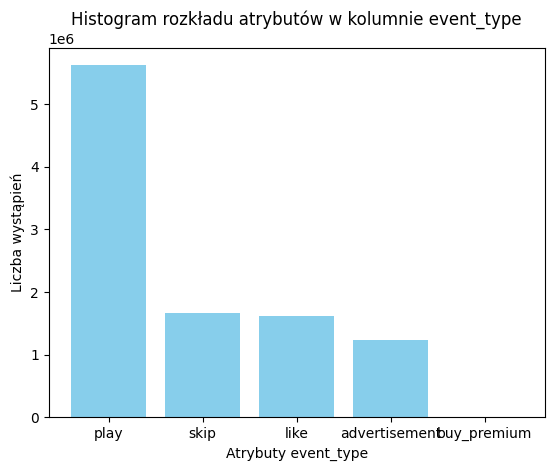

In [13]:
# Rozkład atrybutów w kolumnie event_type
event_type_distribution = sessions_df['event_type'].value_counts()

# Tworzenie histogramu
plt.bar(event_type_distribution.index, event_type_distribution.values, color='skyblue')
plt.title('Histogram rozkładu atrybutów w kolumnie event_type')
plt.xlabel('Atrybuty event_type')
plt.ylabel('Liczba wystąpień')
plt.show()

In [14]:
event_type_distribution

event_type
play             5613896
skip             1668992
like             1620756
advertisement    1236592
buy_premium         7929
Name: count, dtype: int64

Posiadamy dużo danych o każdym typie zdarzeń. Od reszty odstaje jedynie 'buy_premium', który stanowi jedynie ułamek procenta wszystkich zdarzeń. 

## Tabela track_storage

In [15]:
track_storage_df.head() 

,track_id,storage_class,daily_cost
0,6C0WWu7RYKbAgWUI3YC0sT,slow,0.012479
1,4q7EBRq8ncztC2PRmEC7Fy,slow,0.012737
2,7cNyONpVADZVrW9xe3qq4z,slow,0.013967
3,1bKRTzTFz7wHMxpgZSuPR1,slow,0.009685
4,56OEjuyZ3AROnv4aR1XqhD,slow,0.009106


In [16]:
track_storage_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129648 entries, 0 to 129647
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   track_id       129648 non-null  object 
 1   storage_class  129648 non-null  object 
 2   daily_cost     129648 non-null  float64
dtypes: float64(1), object(2)
memory usage: 3.0+ MB


Brak zmian względem poprzedniej wersji danych.

## Tabela tracks

In [17]:
tracks_df.head() 

,id,name,popularity,duration_ms,explicit,id_artist,release_date,danceability,energy,key,mode,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,6C0WWu7RYKbAgWUI3YC0sT,Voglio farti un regalo,40,249573,1,7u710e44HW3K7A5eTnRqHC,2004-09-01,0.727,0.6630,4,0.0,-4.818,0.2770,0.08010,0.000000,0.119,0.633,97.865,4
1,4q7EBRq8ncztC2PRmEC7Fy,My Love - Live / Remastered,34,254733,0,3sFhA6G1N0gG1pszb6kk1m,1976-12-10,0.444,0.3480,5,1.0,-12.729,0.0321,0.65600,0.003740,0.956,0.284,116.685,4
2,7cNyONpVADZVrW9xe3qq4z,Heroes of Sand,45,279347,0,7IAXZaLTb6nkJr8RmVPn5y,2001,0.273,0.8990,6,1.0,-5.131,0.0499,0.00177,0.000006,0.128,0.301,159.872,3
3,1bKRTzTFz7wHMxpgZSuPR1,Shine on Harvest Moon,6,193707,0,5bOsFzuJ6QZMr86ezC4oXY,1961-10-15,0.628,0.0616,0,1.0,-24.973,0.0558,0.78400,0.000009,0.172,0.340,85.012,4
4,56OEjuyZ3AROnv4aR1XqhD,男子漢,19,182120,0,6zJ7WZkyTNmB1bFdmHH2k9,1970-01-11,0.353,0.0663,8,0.0,-24.915,0.0445,0.95800,0.000446,0.241,0.317,100.041,4


In [18]:
tracks_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129648 entries, 0 to 129647
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                129648 non-null  object 
 1   name              129648 non-null  object 
 2   popularity        129648 non-null  int64  
 3   duration_ms       129648 non-null  int64  
 4   explicit          129648 non-null  int64  
 5   id_artist         129648 non-null  object 
 6   release_date      129648 non-null  object 
 7   danceability      129648 non-null  float64
 8   energy            129648 non-null  float64
 9   key               129648 non-null  int64  
 10  mode              25929 non-null   float64
 11  loudness          129648 non-null  float64
 12  speechiness       129648 non-null  float64
 13  acousticness      129648 non-null  float64
 14  instrumentalness  129648 non-null  float64
 15  liveness          129648 non-null  float64
 16  valence           12

### Brakujące wartości

In [19]:
tracks_df.isnull().sum() 

id                       0
name                     0
popularity               0
duration_ms              0
explicit                 0
id_artist                0
release_date             0
danceability             0
energy                   0
key                      0
mode                103719
loudness                 0
speechiness              0
acousticness             0
instrumentalness         0
liveness                 0
valence                  0
tempo                    0
time_signature           0
dtype: int64

Zostały usunięte braki w id, name, popularity, id_artist. Pozostały jedynie braki w mode.

### Rozkład atrybutów

array([[<Axes: title={'center': 'popularity'}>,
        <Axes: title={'center': 'duration_ms'}>,
        <Axes: title={'center': 'explicit'}>,
        <Axes: title={'center': 'danceability'}>],
       [<Axes: title={'center': 'energy'}>,
        <Axes: title={'center': 'key'}>,
        <Axes: title={'center': 'mode'}>,
        <Axes: title={'center': 'loudness'}>],
       [<Axes: title={'center': 'speechiness'}>,
        <Axes: title={'center': 'acousticness'}>,
        <Axes: title={'center': 'instrumentalness'}>,
        <Axes: title={'center': 'liveness'}>],
       [<Axes: title={'center': 'valence'}>,
        <Axes: title={'center': 'tempo'}>,
        <Axes: title={'center': 'time_signature'}>, <Axes: >]],
      dtype=object)

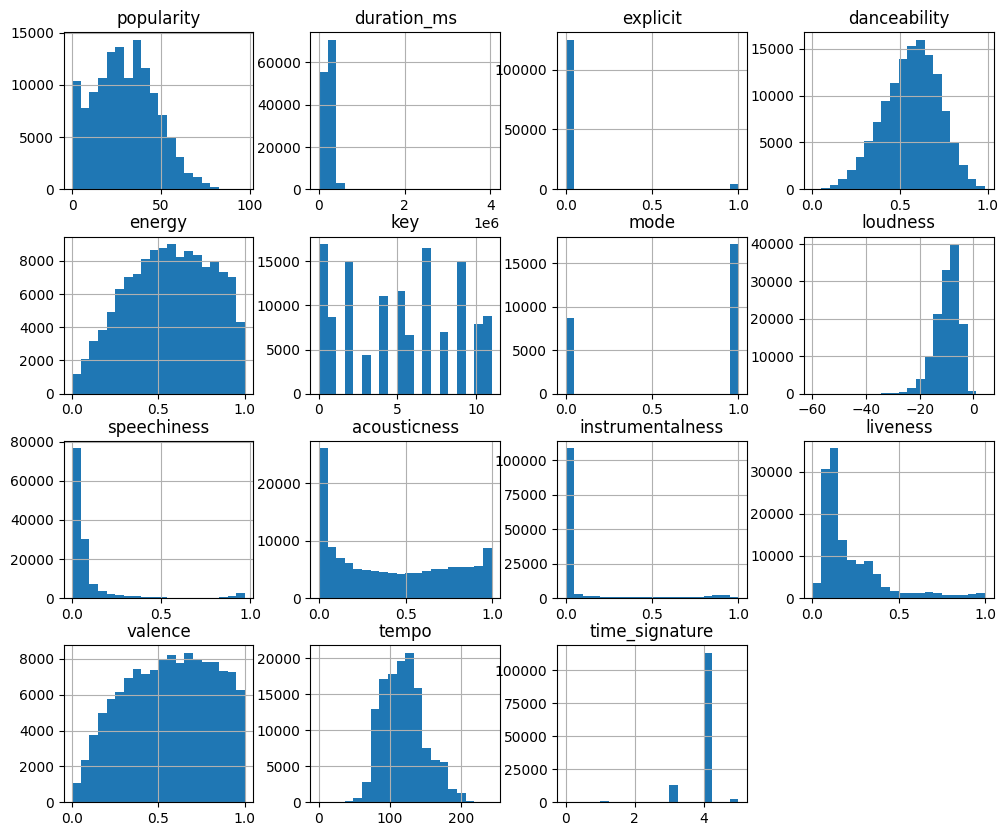

In [20]:
tracks_df.hist(figsize=(12, 10), bins=20)

Rozkłady nie zmieniły się zbytno w porównaniu z poprzednią wersją danych.

## Tabela users

In [21]:
users_df.head() 

,user_id,name,city,street,favourite_genres,premium_user
0,101,Maurycy Lejk,Wrocław,al. Powstańców Śląskich 04,"[regional mexican, blues rock, dance pop]",False
1,102,Julian Rohde,Kraków,al. Rataja 793,"[classic rock, dance pop, argentine rock]",False
2,103,Jerzy Żelazo,Kraków,pl. Orzechowa 509,"[pop rock, new wave, new romantic]",False
3,104,Ada Mazanek,Warszawa,pl. Zacisze 78/30,"[new romantic, alternative rock, c-pop]",False
4,105,Ernest Kukieła,Warszawa,al. Orla 40,"[country rock, metal, mpb]",False


In [22]:
users_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   user_id           20000 non-null  int64 
 1   name              20000 non-null  object
 2   city              20000 non-null  object
 3   street            20000 non-null  object
 4   favourite_genres  20000 non-null  object
 5   premium_user      20000 non-null  bool  
dtypes: bool(1), int64(1), object(4)
memory usage: 800.9+ KB


Liczba użytkowników zwiększyła się z 5000 do 20000.

### Brakujące wartości

In [23]:
users_df.isnull().sum() 

user_id             0
name                0
city                0
street              0
favourite_genres    0
premium_user        0
dtype: int64

### Rozkład atrybutów

premium_user
False    12071
True      7929
Name: count, dtype: int64

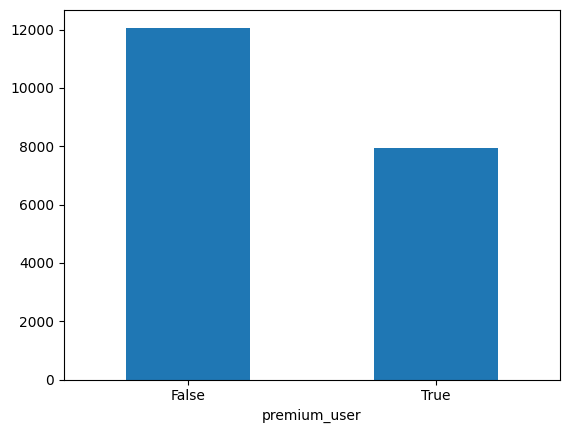

In [26]:
users_df['premium_user'].value_counts().plot(kind='bar', rot=0)
users_df['premium_user'].value_counts()

In [25]:
users_df['city'].unique() 

array(['Wrocław', 'Kraków', 'Warszawa', 'Gdynia', 'Poznań', 'Szczecin',
       'Radom'], dtype=object)

Wciąż posiadamy dane użytkowników jedynie z kilku dużych miast. Nie jesteśmy w stanie zdobyć danych o użytkownikach z innych miast.